<h1> Learning </h1>
<ol>
    <li>Theory</li>
    <ol>
        <li>The Realizeable Case</li>
        <li>The Non-Realizeable Case</li>
        <li>Empirical Risk Minimzation</li>
    </ol>
    <li>Supervised
        <ol>
            <li>Classification</li>
            <p>Binary Classification</p>
            <ol>
                <li>Half Spaces</li>
                <li>Perceptron</li>
                <li>Logistic Regression</li>
                <li>Neural Network</li>
            </ol>
            <p>Multi-Class Classification</p>
              <ol>
                <li>One Versus All</li>
                <li>All-Pairs</li>
            </ol>
        </ol>
    </li>
    <li>Online / Reinforcement learning</li>
</ol>

<h3> The Realizeable Case</h3>
<p>
We assume that there really exists a deterministic function that defines the labeling for the entire domain space and we wish to find that function or to approximate it.
</p>
<br>
Let $\mathbb{X} \sim \mathbb{D}$ such that:
<ol>
    <li> Domain Space - $\mathbb{X}$</li>
    <li> Probability Distribution - $\mathbb{D}$</li>
    <li> Label Set - $\mathbb{Y}$</li>
    <li> Labeling Function - $\exists f:\mathbb{X}\rightarrow \mathbb{Y}|\forall i:f(x_i)=y_i$</li>
</ol>
<h3>Input:</h3>
<ol>
    <li> Training Set - $S\sim \mathbb{D}^{m}=:(X\times Y)^{m} = {(x_1,y_1),(x_2,y_2)...(x_m,y_m)}$</li>
    <li> Hypothesis Class - $\mathbb{H}$</li>
</ol>

<h3>Output:</h3>
<ol>
    <li> Predictor- $h\in H :h : \mathbb{X}\rightarrow \mathbb{Y}$</li>
</ol>

<h3>Measures:</h3>
<ol>
    <li> Real Error - $L_{(\mathbb{D},f)}(h) = Pr_\mathbb{D}\big[h(x) \neq y\big]$</li>
    <li> Empirical Error - $L_{S}(h) = Pr_\mathbb{D}\big[h(x) \neq y\big] = \dfrac{|\{(x_{i},y_{i})\in S:y_{i}\neq h(x_{i})\}|}{|S|}$ </li>
</ol>

<h3> The Non-Realizeable Case</h3>
<p>
We assume that the labels are also generated by a random process, in this scenario two instances of the same values can have a different label!
</p>
<br>
Let $(\mathbb{X},\mathbb{Y}) \sim \mathbb{D}$ such that:
<ol>
    <li> Domain Space - $\mathbb{X} \sim \mathbb{D}_X$</li>
    <li> Label Set - $\mathbb{Y} \sim \mathbb{D}_{y|x}$</li>
    <li> Probability Distribution - $\mathbb{D}_{(X,Y)}$</li>
</ol>
<h3>Input:</h3>
<ol>
    <li> Training Set - $S\sim \mathbb{D}^{m}=:(X\times Y)^{m} = {(x_1,y_1),(x_2,y_2)...(x_m,y_m)}$</li>
    <li> Hypothesis Class - $\mathbb{H}$</li>
</ol>

<h3>Output:</h3>
<ol>
    <li> Predictor- $h\in H :h : \mathbb{X}\rightarrow \mathbb{Y}$</li>
</ol>

<h3>Measures:</h3>
<ol>
    <li> Real Error - $L_{\mathbb{D}}(h) = Pr_\mathbb{D}\big[h(x) \neq y\big]$</li>
    <li> Empirical Error - $L_{S}(h) = Pr_\mathbb{D}\big[h(x) \neq y\big] = \dfrac{|\{(x_{i},y_{i})\in S:y_{i}\neq h(x_{i})\}|}{|S|}$ </li>
</ol>
<h3> Empirical Risk Minimzation - ERM</h3>
We would like to minimize our learners error over the real domain set, but we do not know the distribution of the domain.
therefore we will try to minimize the empirical error which should be an unbiased estimator of the real error (Assuming I.I.D samples and m big enough for convergence of the L.L.N)

<h2> Binary Classification</h2>


In [1]:
# Imports
import numpy as np # NumPy for preproccesing
import matplotlib.pyplot as plt # pyplot for visualization

<h3> Papaya Tasting </h3>

In [2]:
# Let's re-create the papaya's classification problem
class Papaya:
    
    def __init__(self, color,softness):
        self.color = color
        self.softness = softness

    def set_label(self, label):
        self.label = label
        
    def print(self):
        print("Color: " + str(self.color) + " Softness:" + str(self.softness) + " Label: " + str(self.label))
        
def PapayaLabeler(P):
    if(0.5*P.softness + 0.5*P.color > 0.6):
        P.set_label(1)
    else:
        P.set_label(0)

In [3]:
# Generate mock data
N = 10**3
Data = [Papaya(np.random.normal(0,1,1),np.random.normal(0,1,1)) for i in range(N)]

for p in Data:
    PapayaLabeler(p);

In [4]:
# Preprocess the data
X = np.zeros((N,2)) # Features
Y = np.zeros(N) # Labels
for i in range(N):
    X[i][0] = Data[i].color;
    X[i][1] = Data[i].softness;
    Y[i] = Data[i].label
# Get the unique values from the labels to understand the task
task = np.unique(Y) # 2 <=> Binary Classification
print(task)

[0. 1.]


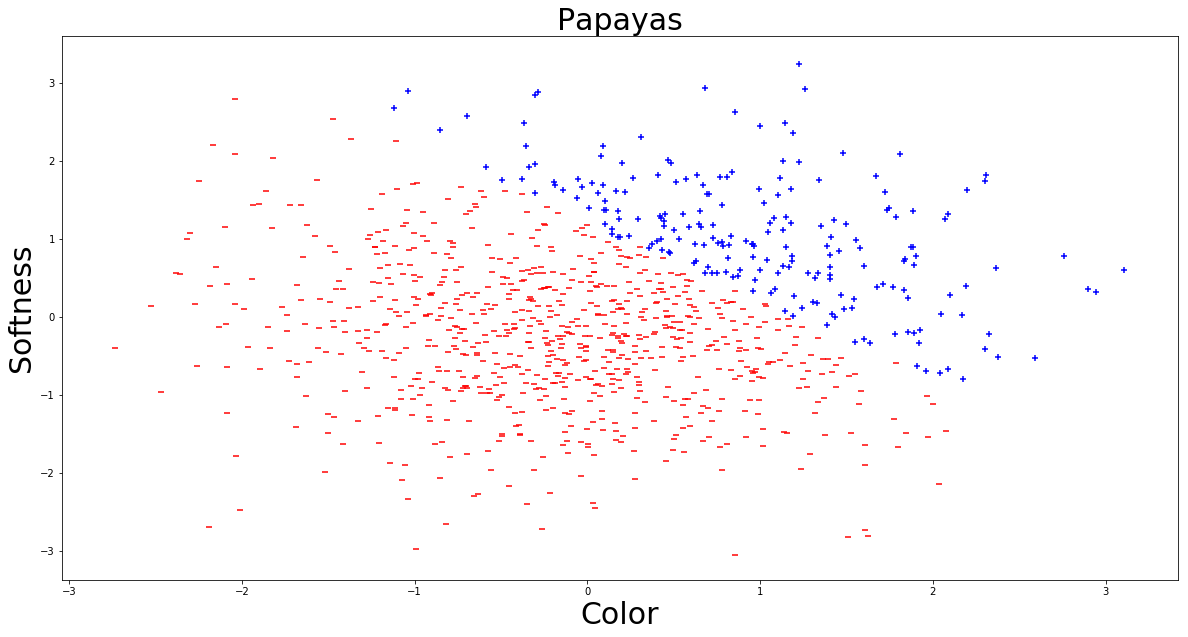

In [5]:
# Visualize the data to get a better first-impression of the problem
fig, ax = plt.subplots(figsize=(20,10))
#plt.ylabel('Hello')
for i in range(N):
    if(Y[i] == task[0]):
        ax.scatter(X[i][0],X[i][1],color='red',marker='_')
    else:
        ax.scatter(X[i][0],X[i][1],color='blue',marker='+')
ax.set_xlabel('Color',fontSize=30)
ax.set_ylabel('Softness',fontSize=30)
ax.set_title('Papayas',fontSize=30)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split # to easily split the data
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


<h2> Half Spaces</h2>
Half Spaces are PAC-Learnable with sample complexity $m \geq \dfrac{d+log(1/ \delta)}{\epsilon}$ 
<br>
Let $\mathbb{H} =: \{h_{w,b}(x) =:Sign\big(\langle w,x\rangle + b\big)\}$



In [13]:
from sklearn import linear_model # linear separator
from sklearn.metrics import accuracy_score # Measure of error for the separators
# Train the Linear Classifier
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
# We learn on the train set using both the features and the labels
clf.fit(X_train, y_train)
# We measure our predictor on the test set using both the features and the labels
y_test_hat = clf.predict(X_test);
accuracy_score(y_test,y_test_hat)

0.9939393939393939

<h3>Perceptron</h3>

In [9]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test);
accuracy_score(y_test,y_test_hat)

0.9848484848484849

<h3>Logistic Regression</h3>
Let $\mathbb{H} =: \{h_{w,b}(x) =:Sigmoid\big(\langle w,x\rangle + b\big)\}$

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_test_hat = clf.predict(X_test);
y_test_probs = clf.predict_proba(X_test);
accuracy_score(y_test,y_test_hat)

0.9878787878787879

<h3>Neural Network - Multi-Layered Perceptron</h3>

In [11]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test);
accuracy_score(y_test,y_test_hat)

0.996969696969697

<h1>Multi-Class Classification</h1>

In [19]:
def PapayaMultiLabeler(P):
    xwb = 0.5*P.softness + 0.5*P.color;
    if(xwb < 0.4):
        P.set_label(0)
    if(xwb >= 0.4 and xwb <= 0.7):
        P.set_label(1)
    if(xwb > 0.7):
        P.set_label(2)
        
# Label the data
for p in Data:
    PapayaMultiLabeler(p);
    
# Preprocess the data
X = np.zeros((N,2)) # Features
Y = np.zeros(N) # Labels
for i in range(N):
    X[i][0] = Data[i].color;
    X[i][1] = Data[i].softness;
    Y[i] = Data[i].label
# Get the unique values from the labels to understand the task
task = np.unique(Y) # > 2 <=> Multi Classification
print(task)

[0. 1. 2.]


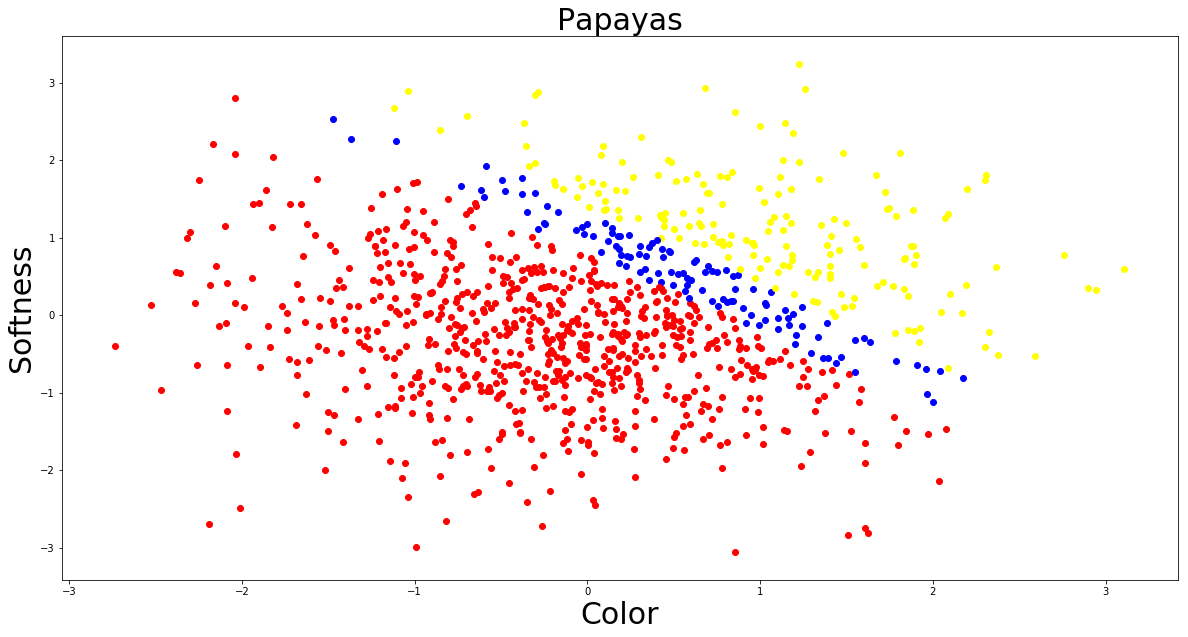

In [24]:
# Visualize the data to get a better first-impression of the problem
fig, ax = plt.subplots(figsize=(20,10))
#plt.ylabel('Hello')
for i in range(N):
    if(Y[i] == task[0]):
        ax.scatter(X[i][0],X[i][1],color='red')
    if(Y[i] == task[1]):
        ax.scatter(X[i][0],X[i][1],color='blue')
    if(Y[i] == task[2]):
        ax.scatter(X[i][0],X[i][1],color='yellow')
ax.set_xlabel('Color',fontSize=30)
ax.set_ylabel('Softness',fontSize=30)
ax.set_title('Papayas',fontSize=30)
plt.show()

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [28]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_test_hat = clf.predict(X_test);
y_test_probs = clf.predict_proba(X_test);
accuracy_score(y_test,y_test_hat)

0.9818181818181818

In [29]:
y_test_hat

array([0., 2., 0., 0., 0., 0., 0., 0., 2., 1., 0., 0., 0., 2., 0., 0., 0.,
       0., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 2., 0., 2., 0., 0., 0., 2., 1., 0., 0.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 2.,
       0., 2., 0., 0., 1., 0., 2., 2., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 2., 0.,
       0., 0., 0., 2., 1., 0., 0., 0., 2., 2., 2., 0., 1., 0., 0., 1., 2.,
       0., 0., 2., 0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 2., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 2., 0., 0., 2.

In [32]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test);
y_test_probs = clf.predict_proba(X_test);
accuracy_score(y_test,y_test_hat)

0.9333333333333333

<h2> Nearest Neighbours </h2>

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_test_hat = neigh.predict(X_test);
accuracy_score(y_test,y_test_hat)

0.9727272727272728